In [1]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차 검증'
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 모델의 최적의 하이퍼 파라미터를 찾기 위한 도구
from sklearn.model_selection import GridSearchCV

# 머신러닝 알고리즘 - 분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# 머신러닝 알고리즘 - 회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

# 차원 축소
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 군집
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth

# 학습 모델 저장을 위한 라이브러리
import pickle

In [2]:
train_df4 = pd.read_csv(r'merge_df.csv')

### 10월

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

train_df5 = train_df4[train_df4['기준년월'] == 201810]
train_df5

,기준년월,ID,이용가능여부_해외겸용_본인,보유여부_해외겸용_본인,수신거부여부_TM,수신거부여부_메일,수신거부여부_DM,이용금액_R3M_신용체크,이용금액_R3M_신용,_1순위카드이용금액,이용카드수_신용체크,_2순위카드이용금액,_1순위카드이용건수,_2순위카드이용건수,이용카드수_신용,상향가능한도금액,상향가능CA한도금액,정상청구원금_B5M,정상청구원금_B0M,정상청구원금_B2M,이용금액_일시불_R12M,이용금액_일시불_B0M,이용금액_오프라인_B0M,이용금액_일시불_R6M,이용금액_일시불_R3M,정상입금원금_B5M,정상입금원금_B0M,이용금액_오프라인_R3M,이용금액_오프라인_R6M,정상입금원금_B2M,_3순위업종_이용금액,_2순위업종_이용금액,이용건수_신용_R12M,_2순위쇼핑업종_이용금액,최대이용금액_일시불_R12M,이용건수_신판_R12M,이용건수_일시불_R12M,_1순위업종_이용금액,_3순위쇼핑업종_이용금액,이용가맹점수,이용건수_오프라인_B0M,이용건수_오프라인_R6M,이용건수_오프라인_R3M,쇼핑_도소매_이용금액,이용건수_신용_R6M,이용건수_신용_B0M,이용건수_신용_R3M,이용건수_신판_R6M,이용건수_신판_B0M,이용건수_신판_R3M,이용건수_일시불_R6M,이용건수_일시불_B0M,이용건수_일시불_R3M,_1순위교통업종_이용금액,연체입금원금_B0M,쇼핑_마트_이용금액,쇼핑_슈퍼마켓_이용금액,교통_주유이용금액,이용금액_온라인_B0M,연체입금원금_B5M,연체입금원금_B2M,이용금액_페이_온라인_B0M,_1순위쇼핑업종_이용금액,연속유실적개월수_기본_24M_카드,이용금액대,청구금액_R6M,청구금액_R3M,청구금액_B0,할인건수_R3M,월중평잔_일시불_B0M,월중평잔_일시불,평잔_일시불_3M,잔액_일시불_B0M,잔액_일시불_B1M,잔액_일시불_B2M,인입횟수_ARS_R6M
1200000,201810,TRAIN_000000,0,0,0,0,0,-367,-367,3157,1,0,26,0,1,0,0,16220,15251,15008,23647,1037,3906,5922,3045,15950,7293,11715,15847,7685,897,1367,162,0,5901,142,139,2020,0,7,6,34,17,0,48,7,21,37,5,15,36,5,15,212,7958,0,0,0,0,269,7322,0,0,17,0,92304,45716,14227,0,857,1035,1582,705,607,697,0
1200001,201810,TRAIN_000001,0,0,0,0,0,8740,8740,9126,1,0,37,0,1,2,1,3985,2776,3117,55161,2801,4049,22944,8628,3423,2776,12186,26526,3117,1764,1911,180,530,12774,178,178,2256,441,27,13,92,41,628,79,11,36,79,11,36,79,11,36,1328,0,0,530,1328,0,562,0,0,628,12,1,20057,9527,2888,0,2577,2995,3293,2669,2565,3138,1
1200002,201810,TRAIN_000002,1,1,0,0,0,12317,12317,14780,1,0,46,0,1,0,0,24512,23325,22547,42564,5844,4532,34087,18393,13456,15563,19008,31259,12905,1151,1372,161,931,4300,144,140,10012,691,30,19,89,56,691,90,15,54,81,13,48,79,13,48,1151,7761,931,608,1151,1055,11056,9641,1643,1853,8,0,163633,77702,27191,0,5902,6526,5284,5176,6160,6781,1
1200003,201810,TRAIN_000003,1,1,0,0,0,8374,8374,8426,1,0,19,0,1,0,0,17246,18808,17898,10433,1877,4211,1920,4631,12473,9402,12490,22899,8393,1323,2472,67,823,5315,47,36,2746,0,16,15,58,39,0,46,12,25,35,10,19,29,9,16,200,9405,914,823,0,0,4772,9504,0,914,8,0,122052,60534,25233,0,1245,1923,3109,1365,744,755,0
1200004,201810,TRAIN_000004,1,1,0,1,0,2139,0,0,1,0,-2,0,0,0,0,0,0,1498,-2401,0,0,-497,2886,0,0,0,0,0,0,0,-1,0,76,-1,-1,0,0,0,0,0,0,0,-2,-1,-2,-2,-1,-2,-2,-1,-2,0,0,0,0,0,0,0,1498,0,0,0,2,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1599995,201810,TRAIN_399995,1,1,0,0,0,2792,0,0,1,0,-2,0,0,2,1,0,0,0,0,0,0,-1274,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,1,4,4,1,4,4,1,4,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,1
1599996,201810,TRAIN_399996,1,1,0,0,0,28718,28718,30104,1,0,65,0,1,7,3,25057,14844,17435,142083,8626,10043,78864,29608,25057,10764,32899,66139,14246,2533,7637,259,769,28034,259,259,7813,388,24,9,68,29,1437,120,17,56,120,17,56,120,17,56,551,4080,0,769,0,0,0,3188,0,1437,17,0,125940,46257,12750,0,4334,4947,9121,3933,4611,3649,1
1599997,201810,TRAIN_399997,1,1,1,1,1,19956,19956,19248,1,0,38,0,1,0,0,9283,6862,6771,43752,4358,4426,21273,13544,5768,6106,13456,25291,5243,2105,2267,162,418,6125,162,156,4087,294,25,10,61,34,0,67,11,34,67,11,34,65,11,33,1818,755,0,418,1818,700,3515,1528,0,1388,24,4,38029,22451,7564,0,3279,3493,2914,2421,2491,2428,1
1599998,201810,TRAIN_399998,0,0,1,1,1,0,0,0,0,0,-2,0,0,2,1,0,0,0,0,0,0,-441,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-2,-1,-2,-2,-1,-2,-2,-1,-2,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,1


In [4]:
drop_cols = [
    'ID', '기준년월', '이용건수_신용_B0M', '이용건수_신용_R3M', '이용건수_신용_R6M',
    '이용건수_신판_B0M', '이용건수_신판_R3M', '이용건수_신판_R6M', '이용건수_신판_R12M',
    '이용건수_오프라인_B0M', '이용건수_오프라인_R3M', '이용건수_오프라인_R6M',
    '이용건수_일시불_B0M', '이용건수_일시불_R3M', '이용건수_일시불_R6M', '이용건수_일시불_R12M',
    '이용금액_R3M_신용', '이용금액_일시불_B0M', '이용금액_일시불_R3M', '이용금액_일시불_R6M', '이용금액_일시불_R12M',
    '이용금액_오프라인_B0M', '이용금액_오프라인_R3M', '이용금액_오프라인_R6M',
    '정상청구원금_B0M', '정상청구원금_B2M', '정상입금원금_B0M', '정상입금원금_B2M', '정상입금원금_B5M',
    '월중평잔_일시불', '월중평잔_일시불_B0M', '잔액_일시불_B1M', '잔액_일시불_B2M',
    '청구금액_B0', '청구금액_R3M', '이용카드수_신용',
    '_1순위카드이용건수', '_2순위카드이용건수', '_3순위쇼핑업종_이용금액',
    '교통_주유이용금액', '수신거부여부_DM', '수신거부여부_메일',
    '이용가맹점수', '보유여부_해외겸용_본인','_1순위카드이용금액', '이용금액_페이_온라인_B0M',
    '쇼핑_도소매_이용금액','쇼핑_마트_이용금액', '연체입금원금_B2M', '연체입금원금_B5M', '이용금액_온라인_B0M',
    '_2순위쇼핑업종_이용금액','_3순위업종_이용금액', '청구금액_R6M',
    '_2순위업종_이용금액','평잔_일시불_3M', '_1순위업종_이용금액'
]

train_df6 = train_df5.drop(columns=drop_cols)


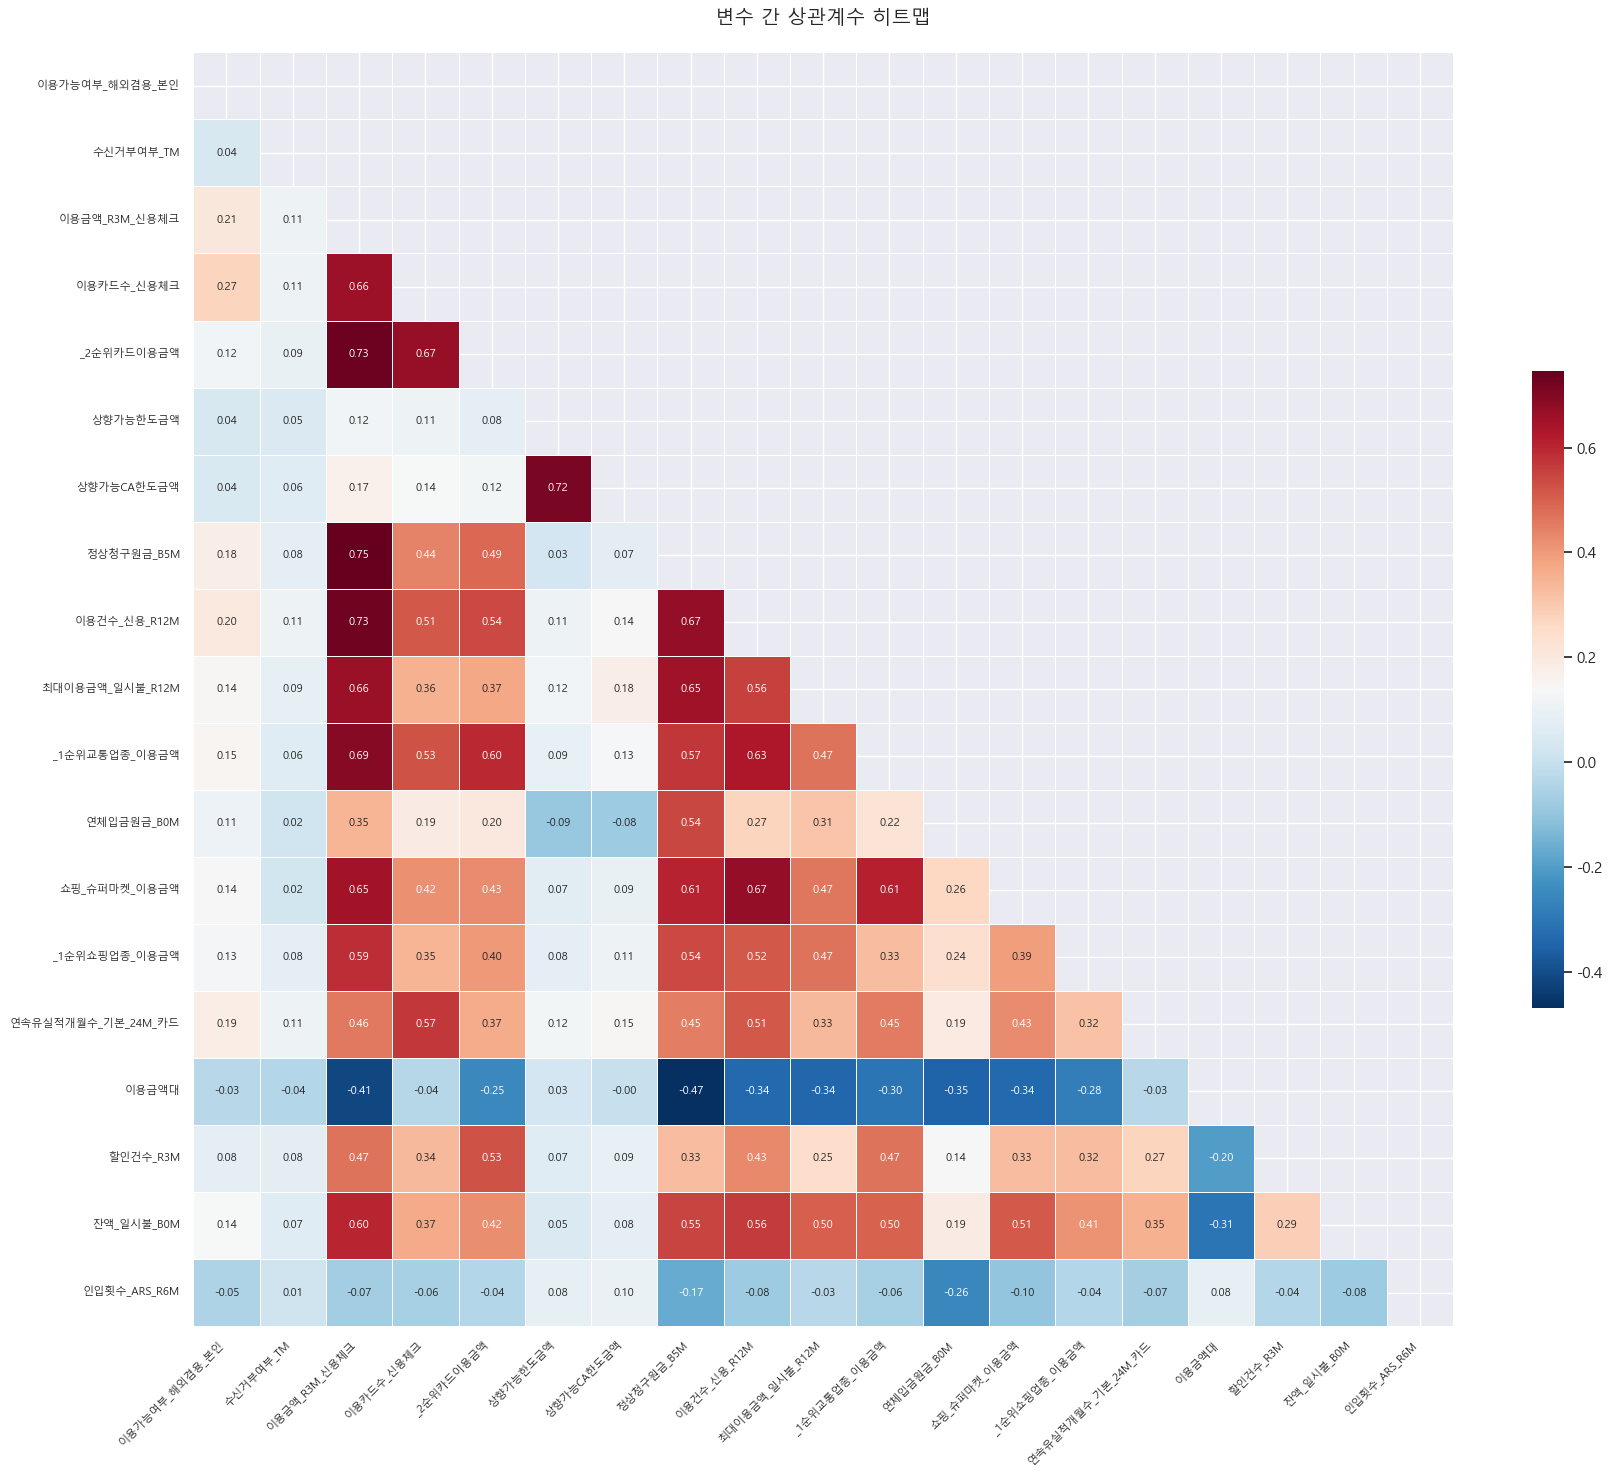

In [5]:
# 상관계수 계산
corr = train_df6.corr()

# 상삼각형 마스크 생성 (중복 제거용)
mask = np.triu(np.ones_like(corr, dtype=bool))

# 시각화
plt.figure(figsize=(18, 15))
sns.heatmap(
    corr,
    mask=mask,
    cmap='RdBu_r',
    annot=True,
    fmt=".2f",
    annot_kws={"size": 8},
    linewidths=0.5,
    cbar_kws={"shrink": 0.5}
)

# 축 글씨 회전
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(rotation=0, fontsize=8)

plt.title("변수 간 상관계수 히트맵", fontsize=14, pad=20)
plt.tight_layout()
plt.show()


In [6]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# vif 표를 출력한 후 vif 계수가 높다고 생각되는 컬럼들을 추가하여 계속 돌려보요요
# vif_X = train_df2.drop(['Transported'], axis=1)
# vif_X = train_df2.drop(['Transported', 'NumberInGroup'], axis=1)
vif_X21 = train_df6.copy()

# vif를 계산하기 위해 상수항을 추가한다.
vif_X22 = sm.add_constant(vif_X21)

vif_X22

,const,이용가능여부_해외겸용_본인,수신거부여부_TM,이용금액_R3M_신용체크,이용카드수_신용체크,_2순위카드이용금액,상향가능한도금액,상향가능CA한도금액,정상청구원금_B5M,이용건수_신용_R12M,최대이용금액_일시불_R12M,_1순위교통업종_이용금액,연체입금원금_B0M,쇼핑_슈퍼마켓_이용금액,_1순위쇼핑업종_이용금액,연속유실적개월수_기본_24M_카드,이용금액대,할인건수_R3M,잔액_일시불_B0M,인입횟수_ARS_R6M
1200000,1.0,0,0,-367,1,0,0,0,16220,162,5901,212,7958,0,0,17,0,0,705,0
1200001,1.0,0,0,8740,1,0,2,1,3985,180,12774,1328,0,530,628,12,1,0,2669,1
1200002,1.0,1,0,12317,1,0,0,0,24512,161,4300,1151,7761,608,1853,8,0,0,5176,1
1200003,1.0,1,0,8374,1,0,0,0,17246,67,5315,200,9405,823,914,8,0,0,1365,0
1200004,1.0,1,0,2139,1,0,0,0,0,-1,76,0,0,0,0,0,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1599995,1.0,1,0,2792,1,0,2,1,0,0,0,0,0,0,0,0,2,0,0,1
1599996,1.0,1,0,28718,1,0,7,3,25057,259,28034,551,4080,769,1437,17,0,0,3933,1
1599997,1.0,1,1,19956,1,0,0,0,9283,162,6125,1818,755,418,1388,24,4,0,2421,1
1599998,1.0,0,1,0,0,0,2,1,0,0,0,0,0,0,0,0,2,0,0,1


In [7]:
vif_X22.columns

Index(['const', '이용가능여부_해외겸용_본인', '수신거부여부_TM', '이용금액_R3M_신용체크', '이용카드수_신용체크',
       '_2순위카드이용금액', '상향가능한도금액', '상향가능CA한도금액', '정상청구원금_B5M', '이용건수_신용_R12M',
       '최대이용금액_일시불_R12M', '_1순위교통업종_이용금액', '연체입금원금_B0M', '쇼핑_슈퍼마켓_이용금액',
       '_1순위쇼핑업종_이용금액', '연속유실적개월수_기본_24M_카드', '이용금액대', '할인건수_R3M',
       '잔액_일시불_B0M', '인입횟수_ARS_R6M'],
      dtype='object')

In [8]:
# vif를 계산한다.
vif2 = pd.DataFrame()
vif2['변수'] = vif_X22.columns
vif2['VIF'] = [variance_inflation_factor(vif_X22.values, i) for i in range(vif_X22.shape[1])]
vif2

,변수,VIF
0,const,47.303587
1,이용가능여부_해외겸용_본인,1.108077
2,수신거부여부_TM,1.029890
3,이용금액_R3M_신용체크,6.198331
4,이용카드수_신용체크,2.854088
5,_2순위카드이용금액,3.033845
6,상향가능한도금액,2.064298
7,상향가능CA한도금액,2.122125
8,정상청구원금_B5M,3.804594
9,이용건수_신용_R12M,2.979430


In [9]:
pd.set_option('display.max_rows', None)
vif_sorted2 = vif2.sort_values(by='VIF', ascending=False)
display(vif_sorted2)

,변수,VIF
0,const,47.303587
3,이용금액_R3M_신용체크,6.198331
8,정상청구원금_B5M,3.804594
5,_2순위카드이용금액,3.033845
9,이용건수_신용_R12M,2.979430
4,이용카드수_신용체크,2.854088
11,_1순위교통업종_이용금액,2.483113
13,쇼핑_슈퍼마켓_이용금액,2.287654
10,최대이용금액_일시불_R12M,2.166745
7,상향가능CA한도금액,2.122125


In [10]:
vif_sorted2.to_csv('VIF10_7.csv', index=False, encoding='utf-8-sig')

---

### drop 컬럼

In [3]:
train_df4 = pd.read_csv(r'merge_df.csv')

In [4]:
test_df4 = pd.read_parquet(r'data\신용카드데이터_test.parquet')

In [6]:
drop_cols = [
    'ID', '기준년월', '이용건수_신용_B0M', '이용건수_신용_R3M', '이용건수_신용_R6M',
    '이용건수_신판_B0M', '이용건수_신판_R3M', '이용건수_신판_R6M', '이용건수_신판_R12M',
    '이용건수_오프라인_B0M', '이용건수_오프라인_R3M', '이용건수_오프라인_R6M',
    '이용건수_일시불_B0M', '이용건수_일시불_R3M', '이용건수_일시불_R6M', '이용건수_일시불_R12M',
    '이용금액_R3M_신용', '이용금액_일시불_B0M', '이용금액_일시불_R3M', '이용금액_일시불_R6M', '이용금액_일시불_R12M',
    '이용금액_오프라인_B0M', '이용금액_오프라인_R3M', '이용금액_오프라인_R6M',
    '정상청구원금_B0M', '정상청구원금_B2M', '정상입금원금_B0M', '정상입금원금_B2M', '정상입금원금_B5M',
    '월중평잔_일시불', '월중평잔_일시불_B0M', '잔액_일시불_B1M', '잔액_일시불_B2M',
    '청구금액_B0', '청구금액_R3M', '이용카드수_신용',
    '_1순위카드이용건수', '_2순위카드이용건수', '_3순위쇼핑업종_이용금액',
    '교통_주유이용금액', '수신거부여부_DM', '수신거부여부_메일',
    '이용가맹점수', '보유여부_해외겸용_본인','_1순위카드이용금액', '이용금액_페이_온라인_B0M',
    '쇼핑_도소매_이용금액','쇼핑_마트_이용금액', '연체입금원금_B2M', '연체입금원금_B5M', '이용금액_온라인_B0M',
    '_2순위쇼핑업종_이용금액','_3순위업종_이용금액', '청구금액_R6M',
    '_2순위업종_이용금액','평잔_일시불_3M', '_1순위업종_이용금액'
]

train_df5 = train_df4.drop(columns=drop_cols)
test_df5=test_df4.drop(columns=drop_cols)

In [7]:
train_df5.to_csv('train.csv', index=False, encoding='utf-8-sig')

In [8]:
test_df5.to_csv('test.csv', index=False, encoding='utf-8-sig')

---

In [5]:
df1=pd.read_parquet(r'data\1.회원정보_test_filtered_data.parquet')
df1

,기준년월,ID,소지카드수_이용가능_신용,소지카드수_유효_신용,이용가능여부_해외겸용_본인,보유여부_해외겸용_본인,수신거부여부_TM,수신거부여부_메일,수신거부여부_DM,이용금액_R3M_신용체크,이용금액_R3M_신용,_1순위카드이용금액,이용카드수_신용체크,_2순위카드이용금액,_1순위카드이용건수,_2순위카드이용건수,이용카드수_신용
0,201807,TEST_00000,2,2,1,1,1,1,1,21458,21458,13852,2,6021,51,33,2
1,201807,TEST_00001,1,1,1,1,0,0,0,18681,10759,11065,2,0,40,0,1
2,201807,TEST_00002,2,2,0,0,0,0,0,40758,40758,27071,2,10704,154,69,2
3,201807,TEST_00003,1,1,1,1,0,0,0,5255,5255,4827,1,0,105,0,1
4,201807,TEST_00004,1,1,1,1,1,1,1,16148,14290,8011,3,6387,52,39,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,201812,TEST_99995,0,0,0,0,0,0,0,0,0,0,0,0,-2,0,0
599996,201812,TEST_99996,1,1,0,0,0,0,0,3110,3110,1231,1,0,4,0,1
599997,201812,TEST_99997,1,1,0,0,0,0,0,0,0,0,0,0,6,0,0
599998,201812,TEST_99998,3,3,1,1,1,1,1,173263,113786,63592,6,31916,185,125,4


In [6]:
df2=pd.read_parquet(r'data\2.신용정보_TEST_통합2.parquet')
df2

,기준년월,ID,상향가능한도금액,상향가능CA한도금액
0,201807,TEST_00000,7,2
1,201807,TEST_00001,0,0
2,201807,TEST_00002,0,0
3,201807,TEST_00003,3,1
4,201807,TEST_00004,2,0
...,...,...,...,...
599995,201812,TEST_99995,0,0
599996,201812,TEST_99996,8,2
599997,201812,TEST_99997,5,1
599998,201812,TEST_99998,9,2


In [7]:
df3=pd.read_parquet(r'data\3.승인매출정보_test.parquet')
df3

,기준년월,ID,정상청구원금_B5M,정상청구원금_B0M,정상청구원금_B2M,이용금액_일시불_R12M,이용금액_일시불_B0M,이용금액_오프라인_B0M,이용금액_일시불_R6M,이용금액_일시불_R3M,...,쇼핑_마트_이용금액,쇼핑_슈퍼마켓_이용금액,교통_주유이용금액,이용금액_온라인_B0M,연체입금원금_B5M,연체입금원금_B2M,이용금액_페이_온라인_B0M,_1순위쇼핑업종_이용금액,연속유실적개월수_기본_24M_카드,이용금액대
0,201807,TEST_00000,3919,6495,2012,49063,7650,9877,26595,20503,...,854,350,1204,684,2414,840,1108,1393,5,02.50만원+
1,201807,TEST_00001,5723,9644,5273,7771,367,4006,-7578,-1832,...,1154,0,1278,1691,2959,763,1595,4463,8,02.50만원+
2,201807,TEST_00002,11267,11519,11366,73003,8547,11298,48483,25225,...,1064,1094,2022,0,0,0,0,1679,24,01.100만원+
3,201807,TEST_00003,0,1375,1072,7421,1270,976,403,2670,...,804,634,0,0,0,196,0,824,5,04.10만원+
4,201807,TEST_00004,1347,3951,1618,10493,709,4017,1238,2982,...,774,323,0,0,0,0,0,890,20,03.30만원+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,201812,TEST_99995,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,09.미사용
599996,201812,TEST_99996,992,205,3736,2631,-121,407,3,-658,...,0,0,0,0,689,0,0,0,8,05.10만원-
599997,201812,TEST_99997,0,0,186,0,0,0,0,0,...,0,0,0,0,0,186,0,0,0,09.미사용
599998,201812,TEST_99998,27335,26308,23261,423882,22617,15388,133431,66757,...,1632,848,2584,7521,12448,9018,7716,50074,24,01.100만원+


In [8]:
df4=pd.read_parquet(r'data\4.청구입금정보(test).parquet')
df4

,ID,기준년월,청구금액_R6M,청구금액_R3M,청구금액_B0,할인건수_R3M
0,TEST_00000,201807,22151,11441,4931,1회 이상
1,TEST_00001,201807,32878,20522,10152,1회 이상
2,TEST_00002,201807,71867,50508,13223,1회 이상
3,TEST_00003,201807,4986,4604,2112,1회 이상
4,TEST_00004,201807,10758,6788,4406,1회 이상
...,...,...,...,...,...,...
599995,TEST_99995,201812,0,0,0,1회 이상
599996,TEST_99996,201812,2237,1256,359,1회 이상
599997,TEST_99997,201812,0,0,0,1회 이상
599998,TEST_99998,201812,108420,48141,21273,1회 이상


In [9]:
df5=pd.read_parquet(r'data\5.잔액정보(test).parquet')
df5

,ID,기준년월,월중평잔_일시불_B0M,월중평잔_일시불,평잔_일시불_3M,잔액_일시불_B0M,잔액_일시불_B1M,잔액_일시불_B2M
0,TEST_00000,201807,6412,5187,3841,4802,2277,0
1,TEST_00001,201807,1010,865,844,1201,1467,544
2,TEST_00002,201807,4407,5591,5606,3046,2496,3096
3,TEST_00003,201807,1107,1545,1510,768,675,1035
4,TEST_00004,201807,1072,1462,1373,637,1395,620
...,...,...,...,...,...,...,...,...
599995,TEST_99995,201812,0,0,0,0,0,0
599996,TEST_99996,201812,260,256,237,191,180,238
599997,TEST_99997,201812,0,0,0,0,0,0
599998,TEST_99998,201812,16911,14005,17039,17916,18779,14586


In [10]:
df6=pd.read_parquet(r'data\6.채널정보(test).parquet')
df6

,ID,기준년월,인입횟수_ARS_R6M
0,TEST_00000,201807,1회 이상
1,TEST_00001,201807,1회 이상
2,TEST_00002,201807,1회 이상
3,TEST_00003,201807,1회 이상
4,TEST_00004,201807,1회 이상
...,...,...,...
599995,TEST_99995,201812,1회 이상
599996,TEST_99996,201812,1회 이상
599997,TEST_99997,201812,1회 이상
599998,TEST_99998,201812,1회 이상


In [11]:
# 1. 먼저 기준이 되는 df1부터 시작
merged_df = df1.copy()

# 2. ID & 기준년월 기준으로 순차 병합
merged_df = merged_df.merge(df2, on=['ID', '기준년월'], how='inner')
merged_df = merged_df.merge(df3, on=['ID', '기준년월'], how='inner')
merged_df = merged_df.merge(df4, on=['ID', '기준년월'], how='inner')
merged_df = merged_df.merge(df5, on=['ID', '기준년월'], how='inner')
merged_df = merged_df.merge(df6, on=['ID', '기준년월'], how='inner')


In [12]:
merged_df.to_csv('test_merged.csv', index=False, encoding='utf-8-sig')